#California Housing Price Dataset

#Feature Description:
1.	**longitude**: A measure of how far west a house is; a higher value is farther west
2.	**latitude**: A measure of how far north a house is; a higher value is farther north
3.	**housingMedianAge**: Median age of a house within a block; a lower number is a newer building
4.	**totalRooms**: Total number of rooms within a block
5.	**totalBedrooms**: Total number of bedrooms within a block
6.	**population**: Total number of people residing within a block
7.	**households**: Total number of households, a group of people residing within a home unit, for a block
8.	**medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.	**medianHouseValue**: Median house value for households within a block (measured in US Dollars)
10.	**oceanProximity**: Location of the house w.r.t ocean/sea


#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import trim_mean, skew, kurtosis
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings

#Load the Data

In [ ]:
!gdown 16DqUNB4hhjepDVwFRKN8l3R7yrkyXdCp

Downloading...
From: https://drive.google.com/uc?id=16DqUNB4hhjepDVwFRKN8l3R7yrkyXdCp
To: /content/housing.csv
100% 1.42M/1.42M [00:00<00:00, 144MB/s]


In [ ]:
data = pd.read_csv("housing.csv")
df = data.copy()

#Dataset Overview

In [ ]:
df.shape

(20640, 10)

In [ ]:
target = 'median_house_value'

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.33,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.30,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.26,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.85,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [ ]:
print(df['ocean_proximity'].unique())
len(df['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


5

In [ ]:
df.describe(include=[object])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#Preprocessing, part 1:

#Null Handling

In [ ]:
#Replace null values with median of the column since the column is highly skewed whe choose median over mean
df = df.fillna(df['total_bedrooms'].median())
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#Duplicated Values

In [ ]:
df.duplicated().sum()

0

There is no duplicated values in our dataframe.

###Mean, Trim_mean, Skewness and Kurtosis

In [ ]:
numeric_columns = df.select_dtypes('number').columns

mean_vs_trimmed_mean = pd.DataFrame({'mean': df[numeric_columns].mean(),
                                     'trimmed_mean': df[numeric_columns].apply(lambda x: trim_mean(x, proportiontocut = 0.1))})


skewness_kurtosis = pd.DataFrame({'skewness': df[numeric_columns].apply(skew),
                                  'kurtosis': df[numeric_columns].apply(kurtosis)})

print('Mean vs Trimmed Mean:')
print(mean_vs_trimmed_mean)
print('\nSkewness and Kurtosis:')
print(skewness_kurtosis)

Mean vs Trimmed Mean:
                         mean  trimmed_mean
longitude             -119.57       -119.52
latitude                35.63         35.51
housing_median_age      28.64         28.49
total_rooms           2635.76       2294.56
total_bedrooms         536.84        470.70
population            1425.48       1256.51
households             499.54        441.20
median_income            3.87          3.65
median_house_value  206855.82     192773.00

Skewness and Kurtosis:
                    skewness  kurtosis
longitude              -0.30     -1.33
latitude                0.47     -1.12
housing_median_age      0.06     -0.80
total_rooms             4.15     32.62
total_bedrooms          3.48     22.24
population              4.94     73.54
households              3.41     22.05
median_income           1.65      4.95
median_house_value      0.98      0.33


#Visualization

###Categorical Features:

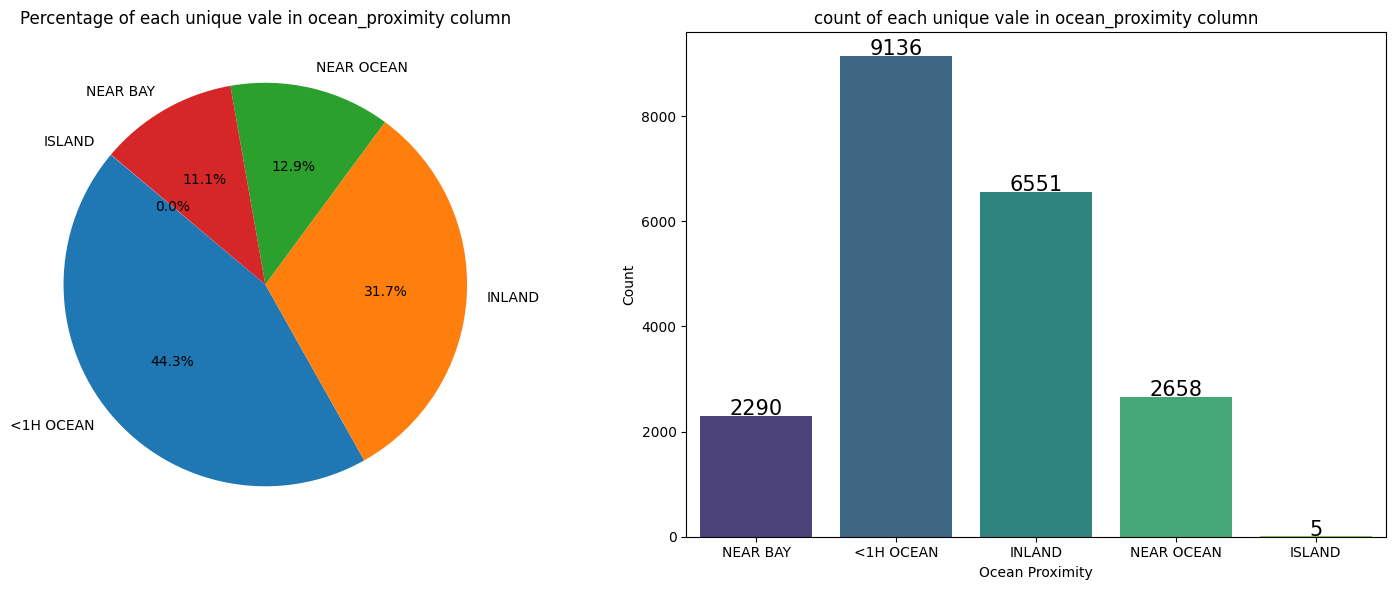

In [ ]:
warnings.filterwarnings('ignore')

OceanProximity_counts = df['ocean_proximity'].value_counts()
plt.figure(figsize=(15,6), dpi = 100)
plt.subplot(1,2,1)
plt.pie(OceanProximity_counts, labels = OceanProximity_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Percentage of each unique vale in ocean_proximity column')


ax = plt.subplot(1,2,2)
sns.countplot(x='ocean_proximity', data= df, palette = 'viridis', ax = ax)
plt.title('count of each unique vale in ocean_proximity column')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')

#Adding count labels above the bars using annotate
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize= 15, xytext=(0,5), textcoords='offset points')
plt.tight_layout()
plt.show()

###Numerical  Feautures

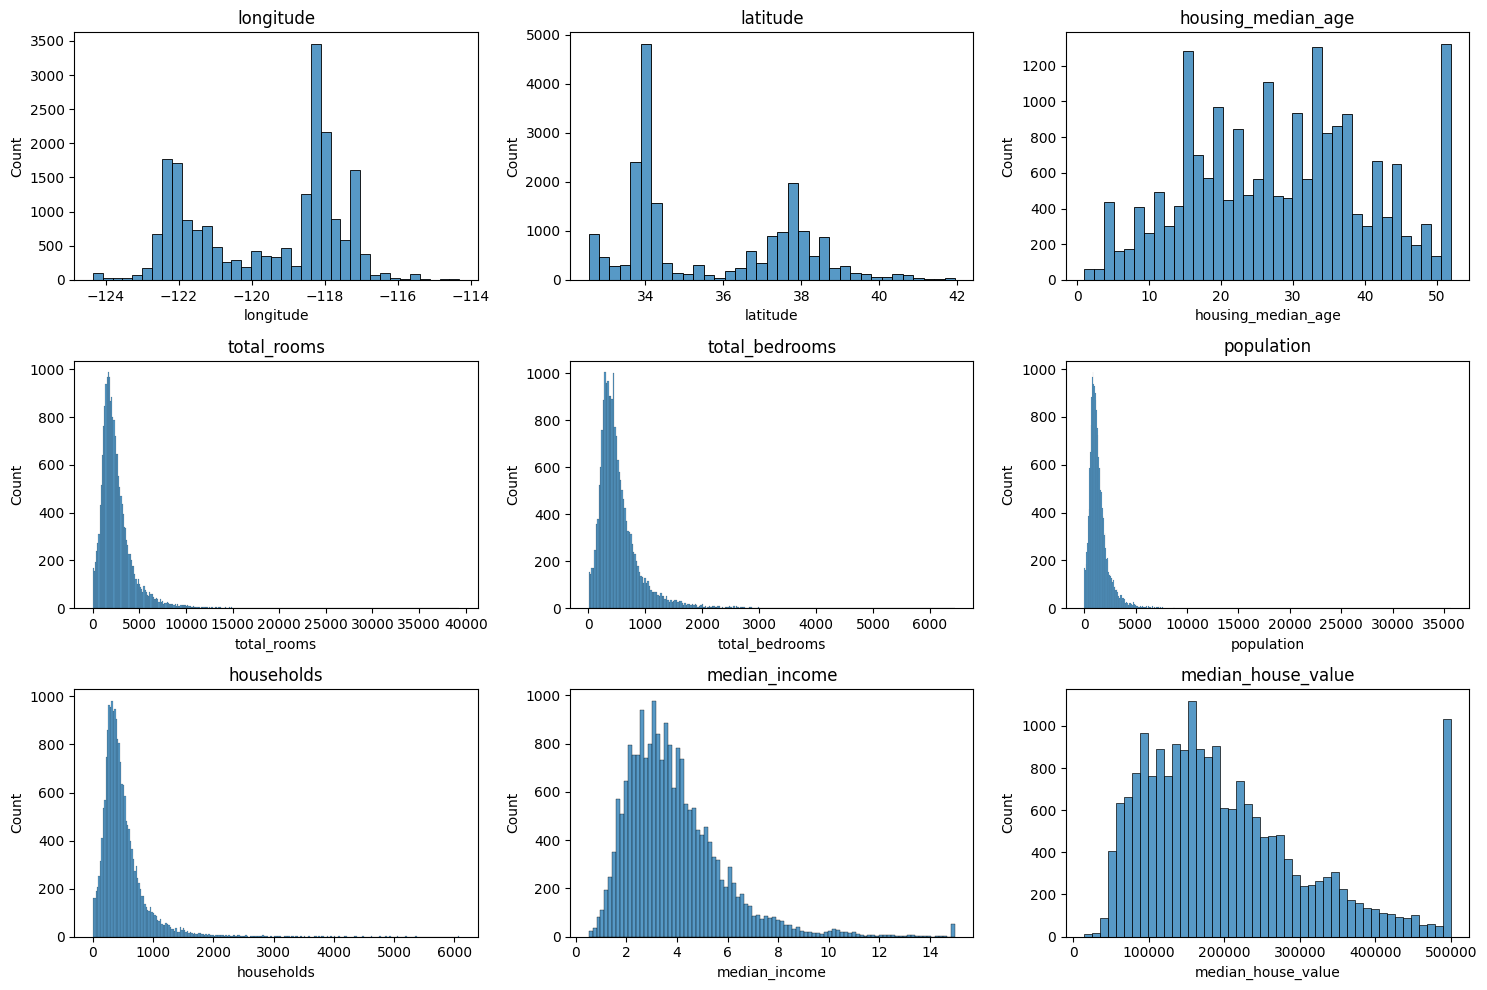

In [ ]:
#Histogram Plot

fig, axs = plt.subplots(3, 3, figsize = (15,10))
index = 0
axs = axs.flatten()

for index, col in enumerate(df.select_dtypes(include = 'number').columns):
  sns.histplot(df[col], ax = axs[index])
  axs[index].set_title(col)

plt.tight_layout()
plt.show();

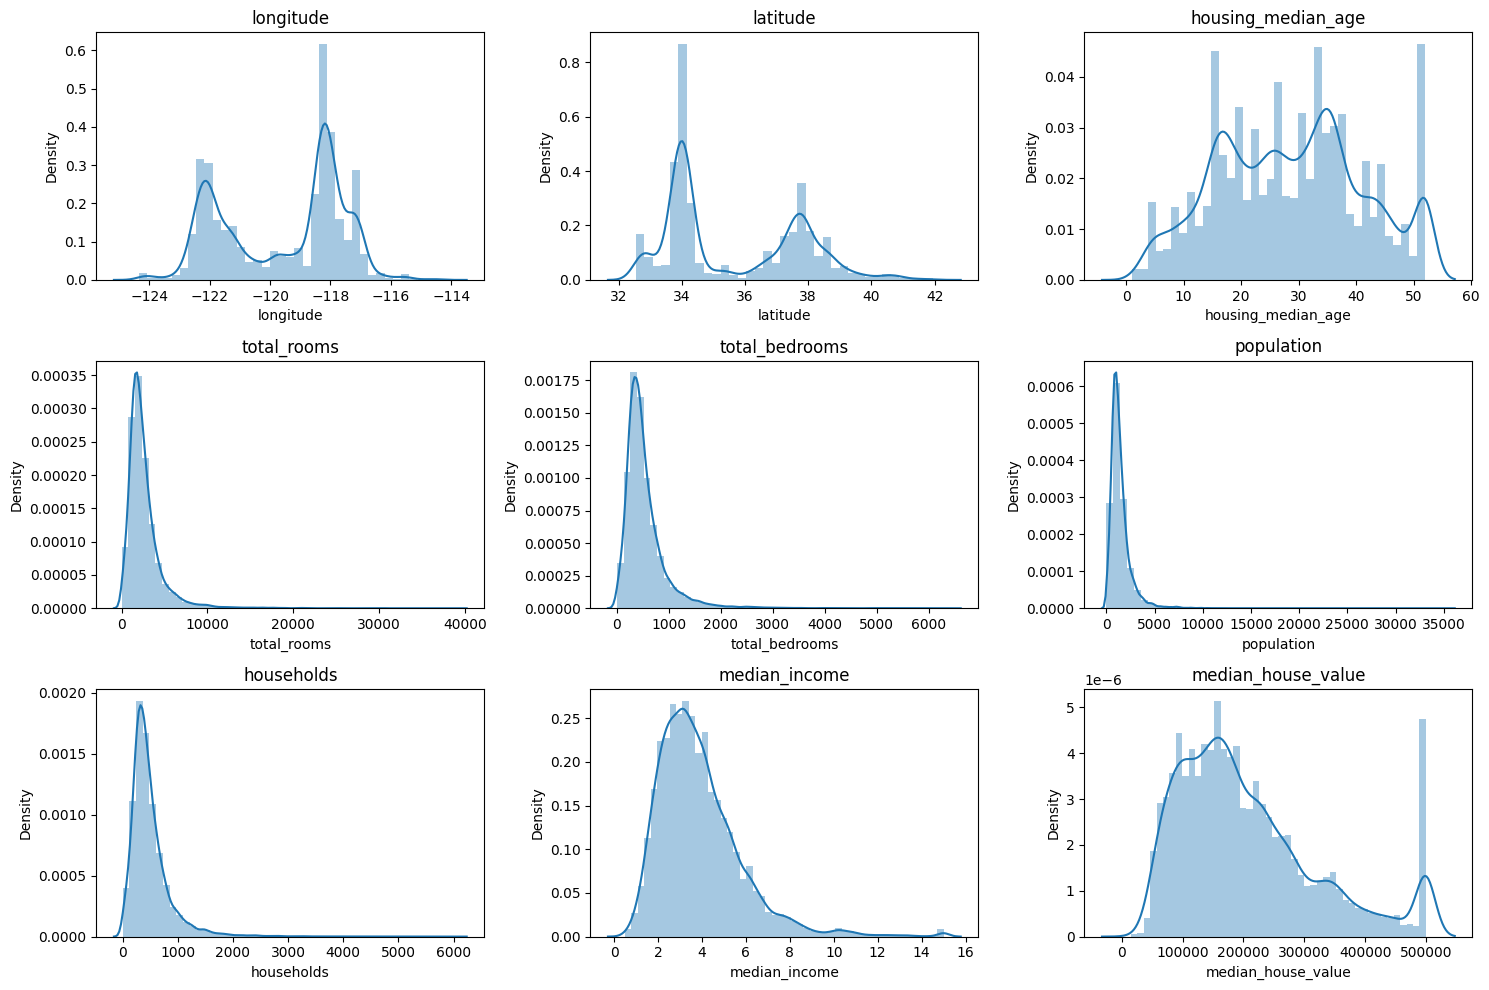

In [ ]:
#Distribution Plot
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(3, 3, figsize = (15, 10), dpi = 100)

index = 0
axs = axs.flatten()
for index, col in enumerate(df.select_dtypes(include = 'number').columns):
  sns.distplot(df[col], ax = axs[index])
  axs[index].set_title(col)

plt.tight_layout()
plt.show()

#Preprocessing, part2:

###Categorical features Handling

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Since the number of sample in 'ISLAND' is just 5, we replace that with the one with the highest frequency.

In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].replace('ISLAND', '<1H OCEAN')
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9141
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, dummy_na=False).astype(float)

In [ ]:
df = df.drop(['ocean_proximity_<1H OCEAN'], axis=1)

In [ ]:
df.shape

(20640, 12)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6604,-118.17,34.18,38.0,1280.0,231.0,828.0,237.0,4.38,166700.0,0.0,0.0,0.0
17507,-121.90,37.35,42.0,2082.0,626.0,1396.0,610.0,3.25,185300.0,0.0,0.0,0.0
12699,-121.44,38.61,34.0,172.0,38.0,149.0,55.0,2.64,55000.0,1.0,0.0,0.0
8678,-118.32,33.88,37.0,1402.0,254.0,722.0,251.0,6.48,269000.0,0.0,0.0,0.0
1357,-121.91,38.02,15.0,2966.0,558.0,1687.0,527.0,3.48,129800.0,1.0,0.0,0.0


In [ ]:
#put the target column at the end of the tabel
df= df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','median_house_value']]


#Correlation

In [ ]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.00
median_income                 0.69
ocean_proximity_NEAR BAY      0.16
ocean_proximity_NEAR OCEAN    0.14
total_rooms                   0.13
housing_median_age            0.11
households                    0.07
total_bedrooms                0.05
population                   -0.02
longitude                    -0.05
latitude                     -0.14
ocean_proximity_INLAND       -0.48
Name: median_house_value, dtype: float64

####6 top correlated columns with target columns are:
1) median_income                 
2)ocean_proximity_INLAND (Negative)
3) ocean_proximity_<1H OCEAN     
4) ocean_proximity_NEAR BAY      
5) ocean_proximity_NEAR OCEAN   
6)latitude (Negative)                     


In [ ]:
corr_matrix = df.corr().abs()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.00
median_income                 0.69
ocean_proximity_INLAND        0.48
ocean_proximity_NEAR BAY      0.16
latitude                      0.14
ocean_proximity_NEAR OCEAN    0.14
total_rooms                   0.13
housing_median_age            0.11
households                    0.07
total_bedrooms                0.05
longitude                     0.05
population                    0.02
Name: median_house_value, dtype: float64

#Heatmap

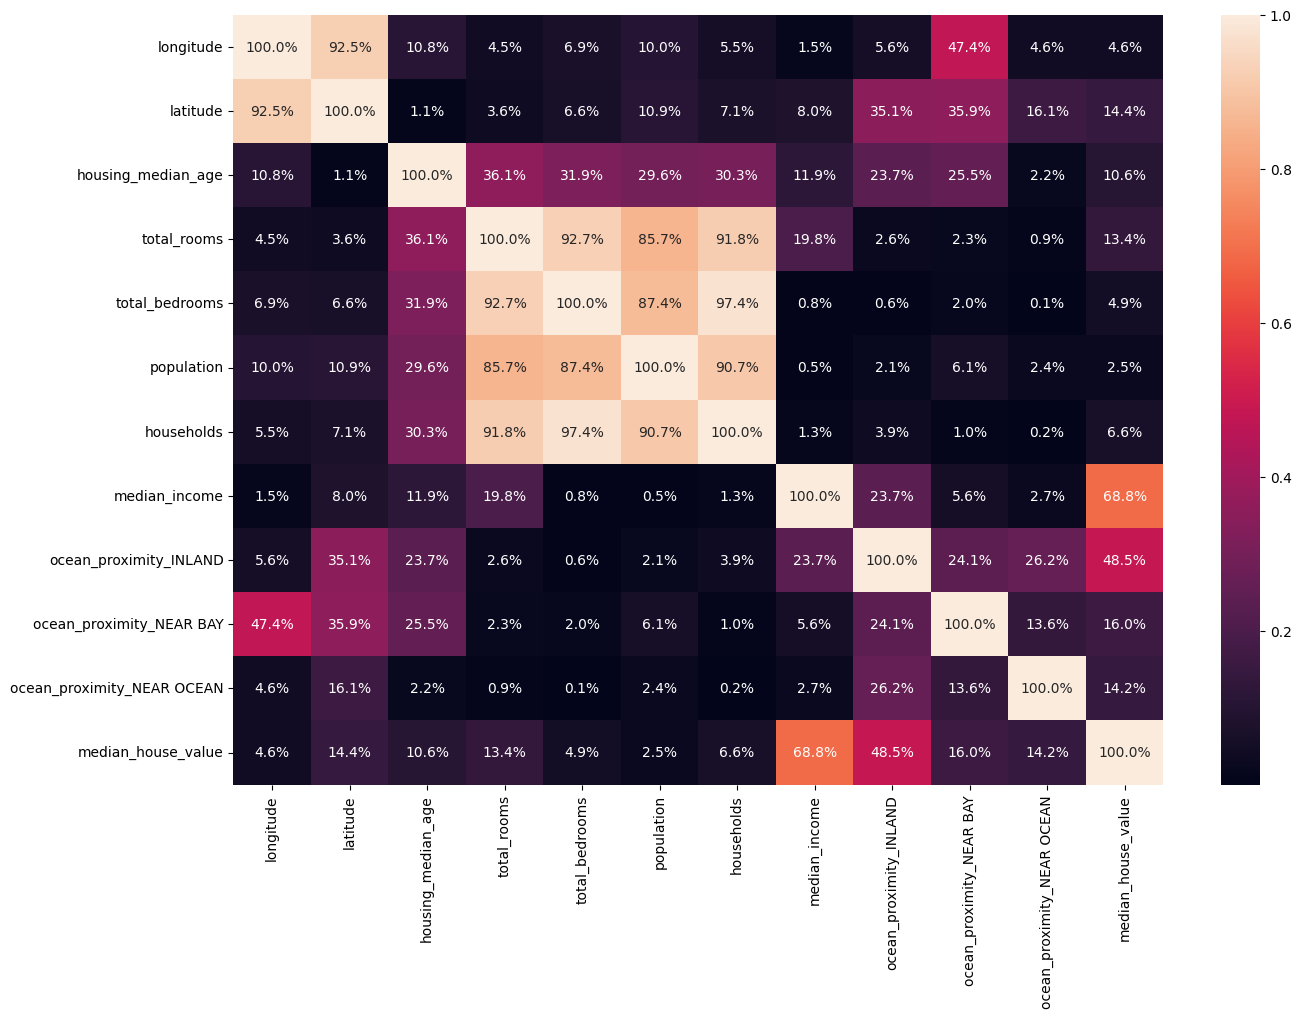

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().abs(),annot=True, fmt= '.1%');

In [ ]:
#Find the highest correlation

print('The highest correlation between feautures:\n')

for x in range(len(df.columns)):
  corr_matrix.iloc[x,x] = 0.0
corr_matrix.abs().idxmax()

The highest correlation between feautures:



longitude                                   latitude
latitude                                   longitude
housing_median_age                       total_rooms
total_rooms                           total_bedrooms
total_bedrooms                            households
population                                households
households                            total_bedrooms
median_income                     median_house_value
ocean_proximity_INLAND            median_house_value
ocean_proximity_NEAR BAY                   longitude
ocean_proximity_NEAR OCEAN    ocean_proximity_INLAND
median_house_value                     median_income
dtype: object

Cleaning the dataset with unnecessary columns

In [ ]:
#Turn categorical value from float64 to float16 in order to draw box plot just for actual numerical columns

df['ocean_proximity_INLAND'] = df['ocean_proximity_INLAND'].astype('float16')
df['ocean_proximity_NEAR BAY'] = df['ocean_proximity_NEAR BAY'].astype('float16')
df['ocean_proximity_NEAR OCEAN'] = df['ocean_proximity_NEAR OCEAN'].astype('float16')


In [ ]:
df.shape

(20640, 12)

In [ ]:
df = df[~(df['median_house_value'] == 500001.00)]
df.shape

(19675, 12)

population            4.96
total_rooms           4.23
total_bedrooms        3.48
households            3.41
median_income         0.91
median_house_value    0.81
latitude              0.46
housing_median_age    0.07
longitude            -0.29
dtype: float64

columns longitude outliers = 0.00%
columns latitude outliers = 0.00%
columns housing_median_age outliers = 0.00%
columns total_rooms outliers = 6.37%
columns total_bedrooms outliers = 6.35%
columns population outliers = 5.74%
columns households outliers = 5.94%
columns median_income outliers = 1.85%
columns median_house_value outliers = 1.79%


We have some columns which are highly correlated
longtitude and latitude
population and households
total_bedrroms and total_rooms
So I'm going to drop these columns

In [ ]:
df = df.drop(columns=['latitude', 'total_bedrooms', 'households'], axis=1)
df.shape

(19675, 9)

#Outlier

In [ ]:
for c, v in df.select_dtypes(include=['float64']).items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(df)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns longitude outliers = 0.00%
columns housing_median_age outliers = 0.00%
columns total_rooms outliers = 6.37%
columns population outliers = 5.74%
columns median_income outliers = 1.85%
columns median_house_value outliers = 1.79%


#Skewness

In [ ]:
skewness = df.select_dtypes(include=['float64']).apply(skew).sort_values(ascending=False)
skewness

population            4.96
total_rooms           4.23
median_income         0.91
median_house_value    0.81
housing_median_age    0.07
longitude            -0.29
dtype: float64

In [ ]:
#Thershold = 1
skewed_columns = ['population', 'total_rooms']

for column in skewed_columns:
  df[f'{column}_sqrt'] = np.sqrt(df[column])
  df[f'{column}_log'] = np.log1p(df[column])

skewness_before = df[skewed_columns].apply(skew)
skewness_after_sqrt = df[[f'{column}_sqrt' for column in skewed_columns]].apply(skew)
skewness_after_log = df[[f'{column}_log' for column in skewed_columns]].apply(skew)

print('Skewness Before Transformation:')
print(skewness_before)
print('\nSkewness after sqrt:')
print(skewness_after_sqrt)
print('\nSkewness after log:')
print(skewness_after_log)

Skewness Before Transformation:
population     4.96
total_rooms    4.23
dtype: float64

Skewness after sqrt:
population_sqrt     1.23
total_rooms_sqrt    1.38
dtype: float64

Skewness after log:
population_log    -1.04
total_rooms_log   -1.05
dtype: float64


Based on above results, sqrt had better influence on skewness

In [ ]:
df.columns

Index(['longitude', 'housing_median_age', 'total_rooms', 'population',
       'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'median_house_value', 'population_sqrt',
       'population_log', 'total_rooms_sqrt', 'total_rooms_log'],
      dtype='object')

In [ ]:
df.shape

(19675, 13)

In [ ]:
df = df.drop(['population','total_rooms','total_rooms_log', 'population_log'], axis=1)
df.shape

(19675, 9)

In [ ]:
for c, v in df.select_dtypes(include=['float64']).items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(df)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns longitude outliers = 0.00%
columns housing_median_age outliers = 0.00%
columns median_income outliers = 1.85%
columns median_house_value outliers = 1.79%
columns population_sqrt outliers = 3.91%
columns total_rooms_sqrt outliers = 4.54%


#Box Plot

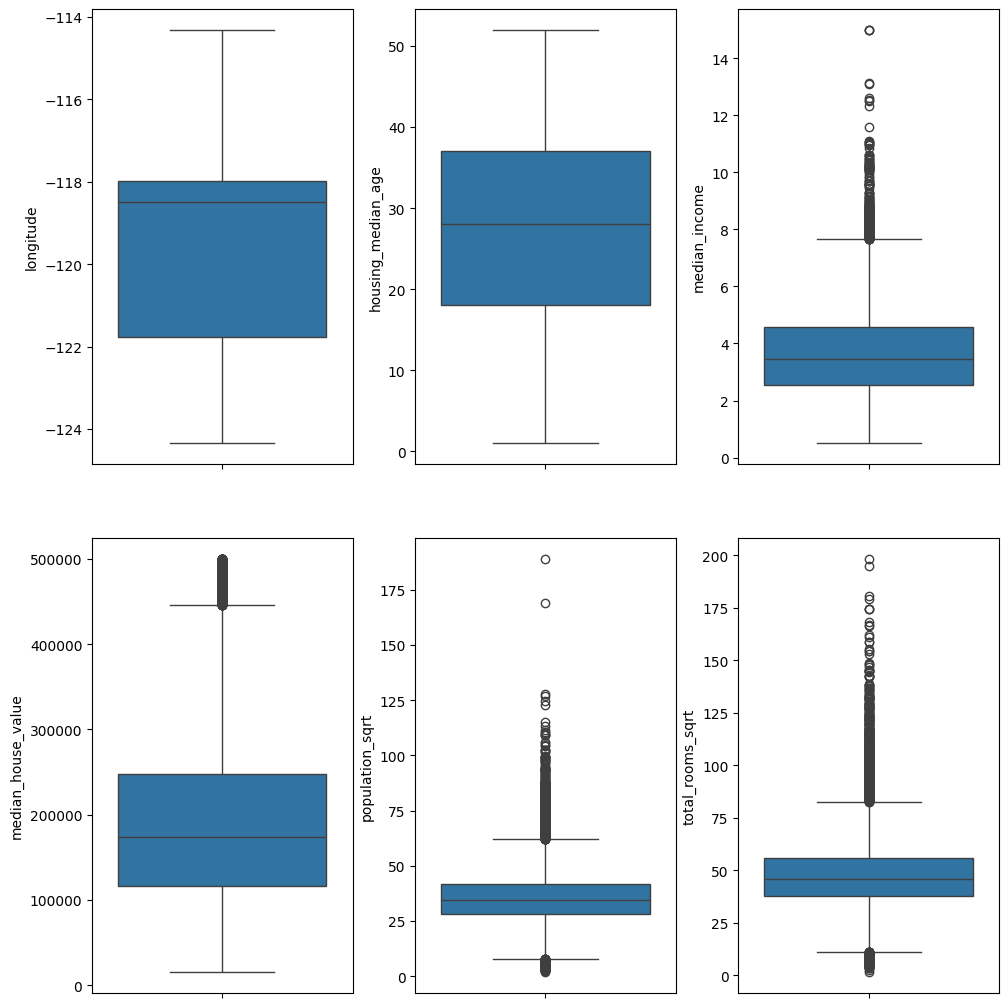

In [ ]:
numeric_columns = df.select_dtypes(include=['float64']).columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
index = 0
axs = axs.flatten()
for column in numeric_columns:
  sns.boxplot(y= column, data= df, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



#Outlier Handling

In [ ]:
def imputed_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  median = df[column].median()
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
  return df

columns_to_impute = ['population_sqrt','total_rooms_sqrt','median_income','median_house_value']


for col in columns_to_impute:
  df_imputed = imputed_outliers(df, col)


In [ ]:
for c, v in df_imputed.select_dtypes(include=['float64']).items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(df_imputed)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns longitude outliers = 0.00%
columns housing_median_age outliers = 0.00%
columns median_income outliers = 0.56%
columns median_house_value outliers = 0.79%
columns population_sqrt outliers = 1.74%
columns total_rooms_sqrt outliers = 2.14%


#Preprocessing, part 2:
Split the data\
Normalize the data

In [ ]:
X = df_imputed.drop(['median_house_value'], axis=1)
y = df_imputed['median_house_value'].values


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((14756, 8), (4919, 8))

In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Steps:
####1) EDA, Overview of our dataset
#####*info
#####*statistical parameters
####2) Visulization
#####*pie and count plot
#####*Histogram and Distribution plot
#####*box plot
#####*heat map
####3) Preprocessing
#####*Null Handling
#####*categorical Handling
#####*Skewness Handling
#####*Normalizing
